# Візуалізація кривої з програми

Виводить криву з `predict_curve.txt`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load curve from program
curve = np.loadtxt('experiments/predict_curve.txt')
print(f"Loaded {len(curve)} points")
print(f"Min: {curve.min():.4e}")
print(f"Max: {curve.max():.4e}")
print(f"Peak position: {np.argmax(curve)}")

Loaded 498 points
Min: 5.6338e-05
Max: 2.0000e-01
Peak position: 84


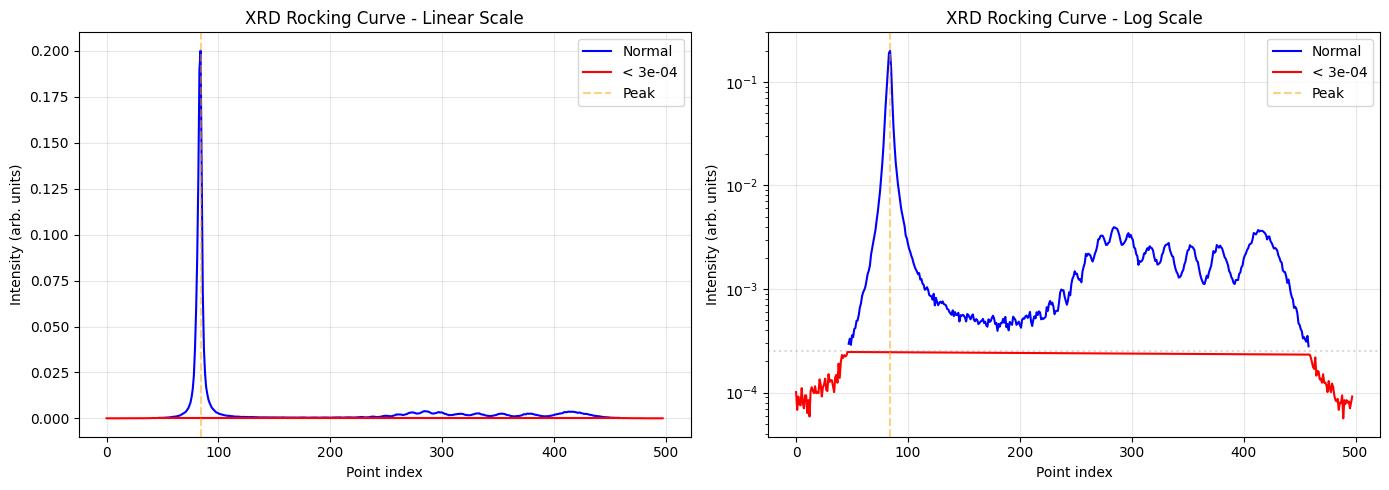

Points below 3e-04: 86 (17.3%)


In [3]:
# Plot curve with threshold coloring
THRESHOLD = 0.00025

# Find points below threshold
mask_low = curve < THRESHOLD
mask_high = curve >= THRESHOLD

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Linear scale
x = np.arange(len(curve))
axes[0].plot(x[mask_high], curve[mask_high], 'b-', linewidth=1.5, label='Normal')
axes[0].plot(x[mask_low], curve[mask_low], 'r-', linewidth=1.5, label=f'< {THRESHOLD:.0e}')
axes[0].axvline(x=np.argmax(curve), color='orange', linestyle='--', alpha=0.5, label='Peak')
# axes[0].axhline(y=THRESHOLD, color='gray', linestyle=':', alpha=0.3)
axes[0].set_xlabel('Point index')
axes[0].set_ylabel('Intensity (arb. units)')
axes[0].set_title('XRD Rocking Curve - Linear Scale')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Log scale
axes[1].semilogy(x[mask_high], curve[mask_high], 'b-', linewidth=1.5, label='Normal')
axes[1].semilogy(x[mask_low], curve[mask_low], 'r-', linewidth=1.5, label=f'< {THRESHOLD:.0e}')
axes[1].axvline(x=np.argmax(curve), color='orange', linestyle='--', alpha=0.5, label='Peak')
axes[1].axhline(y=THRESHOLD, color='gray', linestyle=':', alpha=0.3)
axes[1].set_xlabel('Point index')
axes[1].set_ylabel('Intensity (arb. units)')
axes[1].set_title('XRD Rocking Curve - Log Scale')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

# Count points below threshold
n_low = mask_low.sum()
print(f"Points below {THRESHOLD:.0e}: {n_low} ({n_low/len(curve)*100:.1f}%)")

In [4]:
# Show first and last 10 points
print("First 10 points:")
print(curve[:10])
print("\nLast 10 points:")
print(curve[-10:])

First 10 points:
[1.009390e-04 6.807512e-05 9.154930e-05 7.746479e-05 7.511737e-05
 1.103286e-04 7.981221e-05 7.042254e-05 9.389671e-05 9.389671e-05]

Last 10 points:
[9.389671e-05 5.633803e-05 8.450704e-05 7.746479e-05 8.450704e-05
 7.981221e-05 8.215962e-05 7.042254e-05 7.981221e-05 9.154930e-05]


In [5]:
# Stats
print(f"Total points: {len(curve)}")
print(f"Peak position: index {np.argmax(curve)}")
print(f"Peak intensity: {curve.max():.6e}")
print(f"Min intensity: {curve.min():.6e}")
print(f"Mean intensity: {curve.mean():.6e}")
print(f"Std intensity: {curve.std():.6e}")

Total points: 498
Peak position: index 84
Peak intensity: 2.000000e-01
Min intensity: 5.633803e-05
Mean intensity: 3.453023e-03
Std intensity: 1.596029e-02
